<a href="https://colab.research.google.com/github/Vicente836/Practica-Ihealth/blob/S4/Inspecci%C3%B3n_sepracion_LV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación datos test

In [1]:
try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2024-12-23 13:49:31--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3497 (3.4K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.42K  --.-KB/s    in 0s      

2024-12-23 13:49:32 (47.7 MB/s) - ‘/tmp/gmsh-install.sh’ saved [3497/3497]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/05fe520e/releases/h5py-install.sh
+ [[ https://gith

In [2]:
!pip install meshio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.3 MB/s eta 0:00:00


In [3]:
!pip install ukb-atlas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 2.3 MB/s eta 0:00:00


In [4]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../1-libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../2-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../3-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../4-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselec

In [5]:
import pyvista
pyvista.set_jupyter_backend('static')
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [ ]:
#!pip install tetgen
#!pip install trimesh
#!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20

In [6]:
import pyvista as pv
import os
#import tetgen
import numpy as np
import random

# Generación datos

In [7]:
!ukb-atlas 'heart_meshs' --mesh -m 0 -s 1.5 --subdir 'heart_1'

INFO:ukb.atlas:Downloading https://www.cardiacatlas.org/share/download.php?id=60&token=AR3JSoaxJ9Ev9n8QAkvV4BHJUniyttqm&download to heart_meshs/UKBRVLV.zip. This may take a while.
INFO:ukb.atlas:Done downloading.
INFO:ukb.atlas:Generating points from heart_meshs/UKBRVLV.h5 using mode 0 and std 1.5
INFO:ukb.mesh:Creating mesh for ED with char_length_max=5.0, char_length_min=5.0
INFO:ukb.mesh:Created mesh heart_meshs/heart_1/ED.msh
INFO:ukb.mesh:Creating mesh for ES with char_length_max=5.0, char_length_min=5.0
INFO:ukb.mesh:Created mesh heart_meshs/heart_1/ES.msh


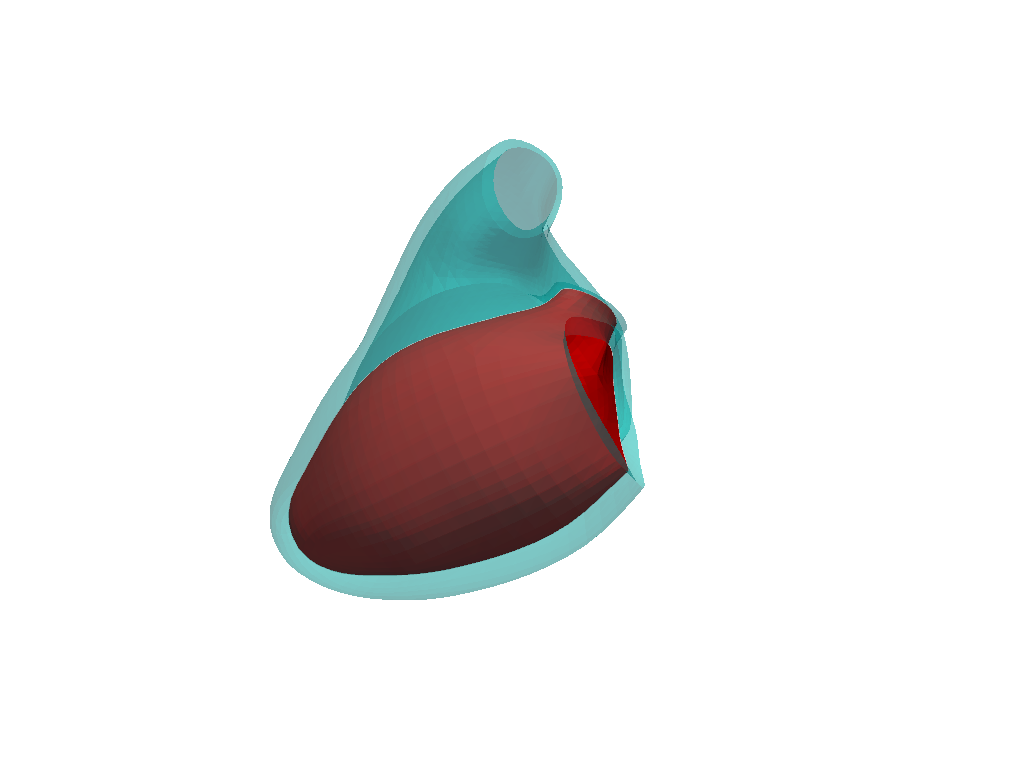

In [22]:
files_list =  ['heart_meshs/heart_1/AV_ED.stl',
'heart_meshs/heart_1/EPI_ED.stl',
'heart_meshs/heart_1/MV_ED.stl',
'heart_meshs/heart_1/PV_ED.stl',
'heart_meshs/heart_1/RVFW_ED.stl',
'heart_meshs/heart_1/RV_ED.stl',
'heart_meshs/heart_1/TV_ED.stl']

LV = pv.read('heart_meshs/heart_1/LV_ED.stl')

mesh_list = [pv.read(f) for f in files_list]
mesh_ED = pv.merge(mesh_list)
#tet_mesh_ED = tetgen.TetGen(mesh_ED)
#tet_mesh_ED.tetrahedralize(order=1, mindihedral=10, minratio=1.5)
mesh_ED["val"] = np.ones_like(mesh_ED.points[:, 0])
p = pv.Plotter()
p.add_mesh(mesh_ED, color = 'cyan', opacity = 0.3)
p.add_mesh(LV, color = 'red')
#p.add_mesh(ED_inter, color = 'cyan')
p.show()

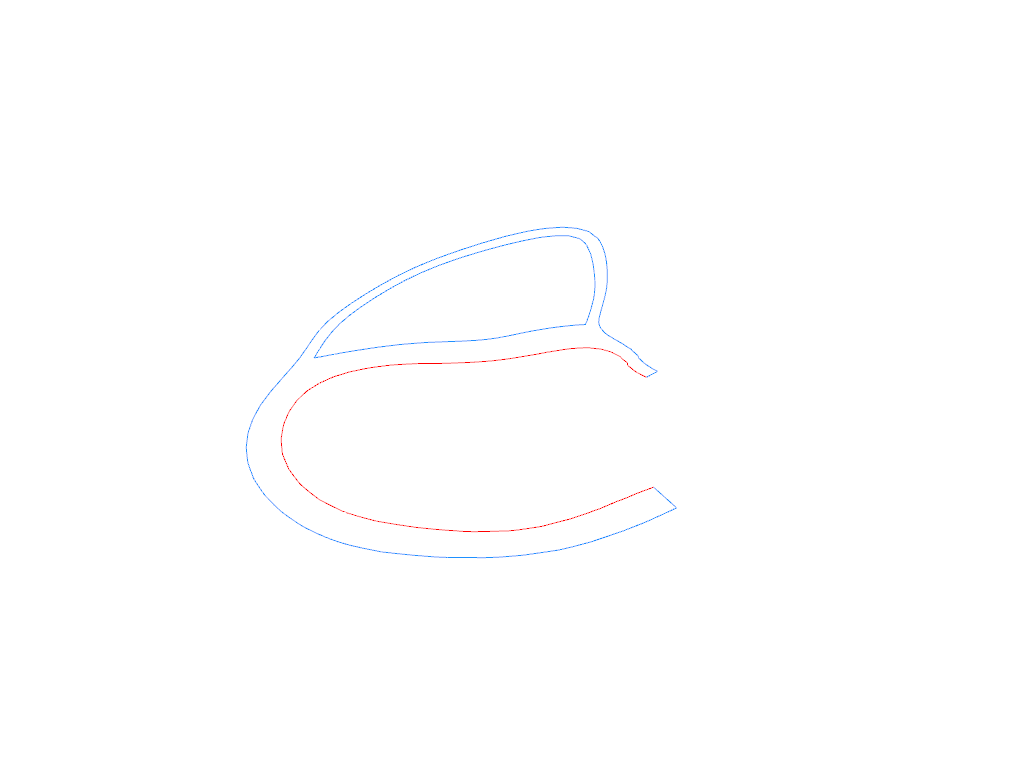

In [32]:
slices = mesh_ED.slice((0,0,1), (0,0,10))
data = pv.PolyData(slices)
slices_LV = LV.slice((0,0,1), (0,0,10))
data_LV = pv.PolyData(slices)
p = pv.Plotter()
p.add_mesh(slices_LV, render_points_as_spheres=True, color = 'red')
p.add_mesh(slices, color = 'dodgerblue', show_edges = True)
p.show()

In [23]:
#creamos nube de puntos sampleando aleatoriamente de slices del corazon
def point_cloud(slices):
  point_cloud = []
  for i, sl in enumerate(slices):
    n = len(sl.points)
    #id = np.random.choice(range(0, n), 0.1*n), replace=False)
    points = sl.points
    point_cloud.extend(points)
  return pv.PolyData(point_cloud)

In [35]:
import pyvista as pv
import os
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

In [51]:
pc = h5.File('UKBRVLV.h5', 'r') # components of PCA
f = 'connectivity.txt' # mesh connectivity
conn = np.loadtxt(f, dtype=int)

# Generates points of the heart model from the components of PCA (pc)
def points_heart(alpha, only_mioc=False):
  n = len(alpha)
  # Create the n principal modes with alpha[i] times the standard deviation each
  S = np.transpose(pc['MU']) + sum( alpha[i]*np.sqrt(pc['LATENT'][0,i])*pc['COEFF'][i,:] for i in range(n))
  # get ED & convert to 3 columns matrix [x, y, z]
  N = S.shape[1] // 2
  ed = np.reshape(S[0,:N], (-1,3))
  if only_mioc == True:
    ed = ed[0:1500]
  return np.array(ed)

In [52]:
m = points_heart(np.zeros(1))[0:1500]

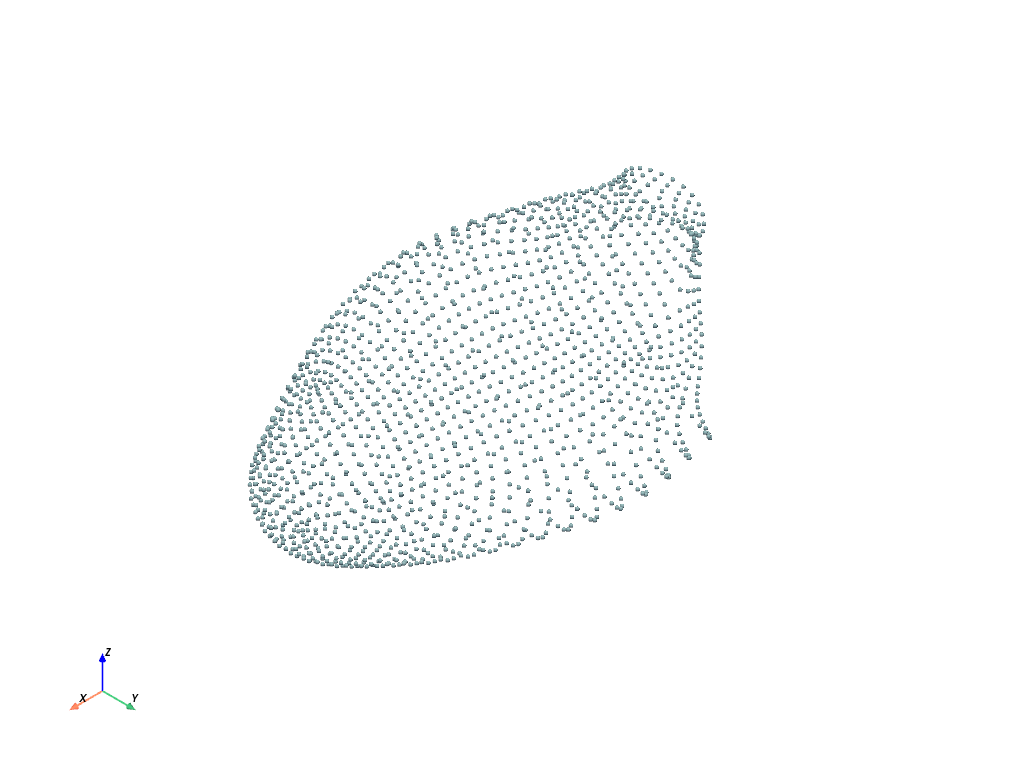

In [53]:
pv.PolyData(m).plot(render_points_as_spheres=True)

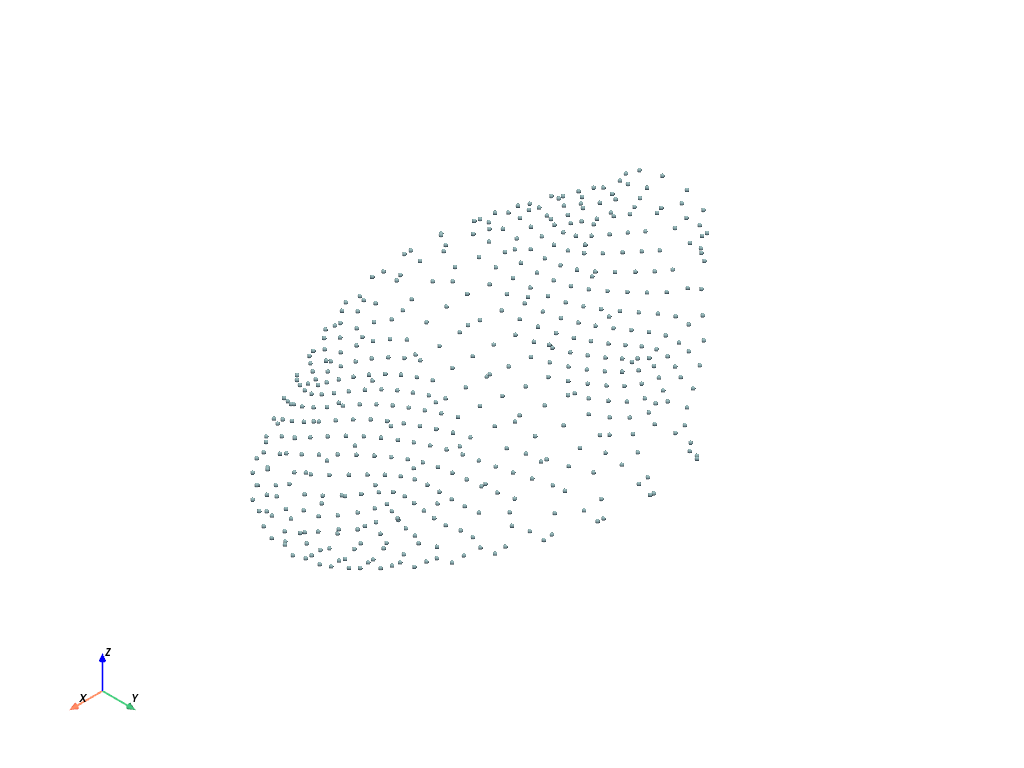

In [50]:
alpha= np.zeros(1)
n = len(alpha)
# Create the n principal modes with alpha[i] times the standard deviation each
S = np.transpose(pc['MU']) + sum( alpha[i]*np.sqrt(pc['LATENT'][0,i])*pc['COEFF'][i,:] for i in range(n))
# get ED & convert to 3 columns matrix [x, y, z]
points = np.reshape(S[0,:N], (-1,3))
h = pv.PolyData(points)
h.plot(render_points_as_spheres=True)

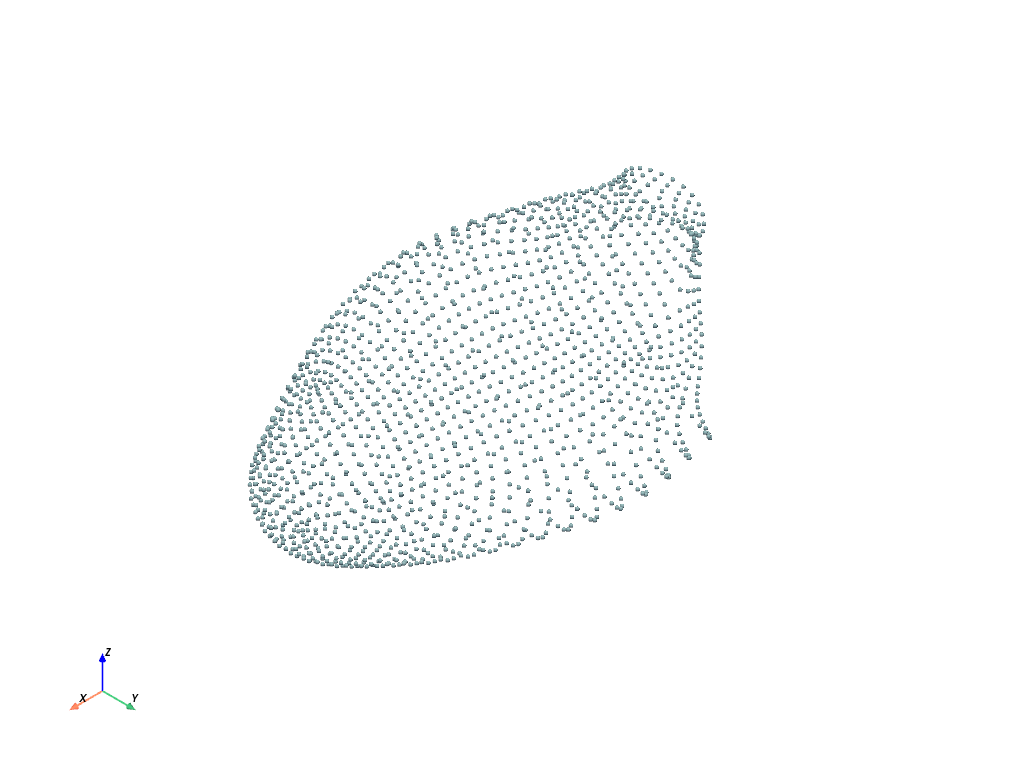

In [43]:
alpha= np.zeros(1)
n = len(alpha)
# Create the n principal modes with alpha[i] times the standard deviation each
S = np.transpose(pc['MU']) + sum( alpha[i]*np.sqrt(pc['LATENT'][0,i])*pc['COEFF'][i,:] for i in range(n))
N = S.shape[1] // 2
# get ED & convert to 3 columns matrix [x, y, z]
points = np.reshape(S[0,:N], (-1,3))
h = pv.PolyData(points[0:1500])
h.plot(render_points_as_spheres=True)